In [1]:
import base_acquire as base

from pprint import pprint
import pandas as pd
import nltk
import re

In [2]:
# read json file named data
data = pd.read_json("data.json")
data


,repo,language,readme_contents
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img..."
...,...,...,...
120,neurodata/brainlit,Python,# Brainlit\n[![DOI](https://zenodo.org/badge/2...
121,patrickmineault/xcorr-notebooks,Jupyter Notebook,# xcorr-notebooks\nAn ongoing collection of ip...
122,ITNG/ModelingNeuralDynamics,Jupyter Notebook,# ModelingNeuralDynamics\nAn Introduction to M...
123,CNS-OIST/a310_cns_2018,Jupyter Notebook,# A310 Computational Neuroscience - Okinawa In...


In [3]:
# only use unique repos
data = data.drop_duplicates(subset="repo")
data

,repo,language,readme_contents
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img..."
...,...,...,...
99,microsoft/Industry-Accelerator-Education,None,"# Education Accelerator\r\nHello ISVs, SIs, Pa..."
101,cnrl/cns-project-template,Python,# cns-project-template\nThis repository provid...
103,ContextLab/computational-neuroscience,TeX,# Overview\n\nThis repository contains materia...
115,karnigili/Computational-Neuroscience,Jupyter Notebook,# Computational Neuroscience\nThis repo showca...


In [4]:
def clean(text: str) -> list:
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = set(nltk.corpus.stopwords.words('english'))
    text = (text.encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split() # tokenization
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

data['clean_text'] = data.readme_contents.apply(clean).apply(' '.join)

/var/folders/00/hwmfmnz96wxfytp1bbw2qlym0000gn/T/ipykernel_20010/939955254.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clean_text'] = data.readme_contents.apply(clean).apply(' '.join)


In [5]:
data

,repo,language,readme_contents,clean_text
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...,ccxt cryptocurrency exchange trading library b...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...,engine deprecation note engine api introduced ...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...,freqtradehttpsrawgithubusercontentcomfreqtrade...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img...",p idreadmea hrefhttpsgunecoimg width40 srchttp...
...,...,...,...,...
99,microsoft/Industry-Accelerator-Education,None,"# Education Accelerator\r\nHello ISVs, SIs, Pa...",education accelerator hello isvs si partner cu...
101,cnrl/cns-project-template,Python,# cns-project-template\nThis repository provid...,cnsprojecttemplate repository provides templat...
103,ContextLab/computational-neuroscience,TeX,# Overview\n\nThis repository contains materia...,overview repository contains material short ma...
115,karnigili/Computational-Neuroscience,Jupyter Notebook,# Computational Neuroscience\nThis repo showca...,computational neuroscience repo showcase work ...


In [6]:
# view nulls
data.isnull().sum()

repo               0
language           9
readme_contents    0
clean_text         0
dtype: int64

Are there any words that uniquely identify a programming language?

In [7]:
# rename columns
data.rename(columns={'repo': 'repo_name', 'readme_contents': 'text', 'language': 'programming_lang'}, inplace=True)

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [21]:
data

,repo_name,programming_lang,text,clean_text
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...,ccxt cryptocurrency exchange trading library b...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...,engine deprecation note engine api introduced ...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...,freqtradehttpsrawgithubusercontentcomfreqtrade...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img...",p idreadmea hrefhttpsgunecoimg width40 srchttp...
...,...,...,...,...
99,microsoft/Industry-Accelerator-Education,None,"# Education Accelerator\r\nHello ISVs, SIs, Pa...",education accelerator hello isvs si partner cu...
101,cnrl/cns-project-template,Python,# cns-project-template\nThis repository provid...,cnsprojecttemplate repository provides templat...
103,ContextLab/computational-neuroscience,TeX,# Overview\n\nThis repository contains materia...,overview repository contains material short ma...
115,karnigili/Computational-Neuroscience,Jupyter Notebook,# Computational Neuroscience\nThis repo showca...,computational neuroscience repo showcase work ...


In [23]:
# Let's first take a look at how many of the texts are in what programming language.
data.programming_lang.value_counts()

JavaScript          24
Python              20
Jupyter Notebook    11
Java                 4
C                    4
HTML                 4
C++                  4
Ruby                 3
Go                   2
TypeScript           2
TeX                  2
Shell                2
C#                   1
Groff                1
Matlab               1
MATLAB               1
R                    1
Kotlin               1
G-code               1
PHP                  1
CSS                  1
Swift                1
Mathematica          1
Assembly             1
Objective-C          1
Name: programming_lang, dtype: int64

In [26]:
# create new dataframe with the bottom 19 programming languages
data_19 = data[data.programming_lang.isin(data.programming_lang.value_counts().index[:19].tolist())]
data_19

,repo_name,programming_lang,text,clean_text
0,ccxt/ccxt,JavaScript,# CCXT – CryptoCurrency eXchange Trading Libra...,ccxt cryptocurrency exchange trading library b...
1,openssl/openssl,C,Engines\n=======\n\nDeprecation Note\n--------...,engine deprecation note engine api introduced ...
2,HelloZeroNet/ZeroNet,JavaScript,# ZeroNet [![Build Status](https://travis-ci.o...,zeronet build statushttpstravisciorghellozeron...
3,freqtrade/freqtrade,Python,# ![freqtrade](https://raw.githubusercontent.c...,freqtradehttpsrawgithubusercontentcomfreqtrade...
4,amark/gun,JavaScript,"<p id=""readme""><a href=""https://gun.eco/""><img...",p idreadmea hrefhttpsgunecoimg width40 srchttp...
...,...,...,...,...
97,arschles/go-in-5-minutes,JavaScript,# Go In 5 Minutes\n\n[![Build Status](https://...,go 5 minute build statushttpstravisciorgarschl...
101,cnrl/cns-project-template,Python,# cns-project-template\nThis repository provid...,cnsprojecttemplate repository provides templat...
103,ContextLab/computational-neuroscience,TeX,# Overview\n\nThis repository contains materia...,overview repository contains material short ma...
115,karnigili/Computational-Neuroscience,Jupyter Notebook,# Computational Neuroscience\nThis repo showca...,computational neuroscience repo showcase work ...


In [10]:
labels = pd.concat([data.programming_lang.value_counts(),
                    data.programming_lang.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
JavaScript,24,0.252632
Python,20,0.210526
Jupyter Notebook,11,0.115789
Java,4,0.042105
C,4,0.042105
HTML,4,0.042105
C++,4,0.042105
Ruby,3,0.031579
Go,2,0.021053
TypeScript,2,0.021053


Let's break the data up into seperate pieces:

- The words that appear in Javascript.

- The words that appear in Python.

- Words that appear in Jupyter Notebooks.

- Words that appear in Java.

- Words that appear in C++.

- Words that appear in C.

- Words that appear in HTML.

- All other words.


In [11]:
import unicodedata

ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') # + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


In [12]:
javascript_words = clean(' '.join(data[data.programming_lang == 'JavaScript'].clean_text))
python_words = clean(' '.join(data[data.programming_lang == 'Python'].clean_text))
jupyter_words = clean(' '.join(data[data.programming_lang == 'Jupyter Notebook'].clean_text))
java_words = clean(' '.join(data[data.programming_lang == 'Java'].clean_text))
c_words = clean(' '.join(data[data.programming_lang == 'C'].clean_text))
c_plus_words = clean(' '.join(data[data.programming_lang == 'C++'].clean_text))
html_words = clean(' '.join(data[data.programming_lang == 'HTML'].clean_text))

rudy_words = clean(' '.join(data[data.programming_lang == 'Rudy'].clean_text))
go_words = clean(' '.join(data[data.programming_lang == 'Go'].clean_text))
type_words = clean(' '.join(data[data.programming_lang == 'TypeScript'].clean_text))
tex_words = clean(' '.join(data[data.programming_lang == 'TeX'].clean_text))
shell_words = clean(' '.join(data[data.programming_lang == 'Shell'].clean_text))

all_words = clean(' '.join(data.clean_text))
# other_words = clean(' '.join(data[data.programming_lang != 'JavaScript', 'Python', 'Jupyter Notebook', 'Java', 'C', 'C++', 'HTML'].clean_text))

In [13]:
javascript_freq = pd.Series(javascript_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
jupyter_freq = pd.Series(jupyter_words).value_counts()
java_freq = pd.Series(java_words).value_counts()
c_freq = pd.Series(c_words).value_counts()
c_plus_freq = pd.Series(c_plus_words).value_counts()
html_freq = pd.Series(html_words).value_counts()


rudy_freq = pd.Series(rudy_words).value_counts()
go_freq = pd.Series(go_words).value_counts()
type_freq = pd.Series(type_words).value_counts()
tex_freq = pd.Series(tex_words).value_counts()
shell_freq = pd.Series(shell_words).value_counts()

all_freq = pd.Series(all_words).value_counts()
# other_freq = pd.Series(other_words).value_counts()

/var/folders/00/hwmfmnz96wxfytp1bbw2qlym0000gn/T/ipykernel_20010/2845687982.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  rudy_freq = pd.Series(rudy_words).value_counts()


In [14]:
word_counts = (pd.concat([all_freq, javascript_freq, python_freq, jupyter_freq, java_freq, c_freq, c_plus_freq, html_freq, rudy_freq, go_freq, type_freq, tex_freq, shell_freq], axis=1, sort=True)
                .set_axis(['all', 'javascript', 'python', 'jupyter', 'java', 'C', 'C_plus', 'html', 'rudy', 'go', 'type', 'tex', 'shell'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts

,all,javascript,python,jupyter,java,C,C_plus,html,rudy,go,type,tex,shell
0,31,7,5,1,0,6,0,0,0,0,0,0,0
00,2,1,0,0,0,0,0,0,0,0,0,0,0
0000,1,1,0,0,0,0,0,0,0,0,0,0,0
000030,3,0,0,3,0,0,0,0,0,0,0,0,0
000200,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
zubhub,12,12,0,0,0,0,0,0,0,0,0,0,0
zubhub_backend,1,1,0,0,0,0,0,0,0,0,0,0,0
zubhubzubhub_frontendzubhub,1,1,0,0,0,0,0,0,0,0,0,0,0
zurich,3,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
word_counts.sort_values(by='all', ascending=False).head(10)


,all,javascript,python,jupyter,java,C,C_plus,html,rudy,go,type,tex,shell
data,513,69,56,33,8,15,7,72,0,1,4,0,6
use,378,87,56,12,7,37,16,11,0,8,13,2,1
version,346,177,18,4,6,15,8,9,0,24,12,0,18
using,314,78,33,14,5,28,6,17,0,10,14,1,2
project,260,56,63,15,7,5,7,15,0,6,3,0,6
1,257,54,37,11,3,7,2,3,0,0,0,1,0
api,254,173,19,0,13,18,0,10,0,0,8,0,0
code,250,56,34,14,4,36,15,7,0,3,6,2,1
run,249,100,32,11,3,18,8,2,0,9,34,0,2
var,246,239,0,0,2,0,0,0,0,0,0,0,0


In [16]:
pd.concat([word_counts[word_counts.javascript == 0].sort_values(by='javascript').tail(6),
           word_counts[word_counts.python == 0].sort_values(by='python').tail(6),
           word_counts[word_counts.jupyter == 0].sort_values(by='jupyter').tail(6),
           word_counts[word_counts.java == 0].sort_values(by='java').tail(6),
           word_counts[word_counts.C == 0].sort_values(by='C').tail(6),
           word_counts[word_counts.C_plus == 0].sort_values(by='C_plus').tail(6),
           word_counts[word_counts.html == 0].sort_values(by='html').tail(6),
           word_counts[word_counts.rudy == 0].sort_values(by='rudy').tail(6),
           word_counts[word_counts.go == 0].sort_values(by='go').tail(6),
           word_counts[word_counts.type == 0].sort_values(by='type').tail(6),
           word_counts[word_counts.tex == 0].sort_values(by='tex').tail(6),
           word_counts[word_counts.shell == 0].sort_values(by='shell').tail(6)]).T


,extracurricular,extramurallysupported,extrascoursesextrascoursesmd,extrasolar,extract,zygmunt,explanatory,explicit,explicitly,exploit,...,excludedhttpsgithubcomccxtccxtissues225issuecomment331905178,exclusive,exchangeid,zygmunt,excel,excellent,except,exception,excerpt,zygmunt
all,1,1,1,4,7,1,1,2,2,1,...,1,1,1,1,4,1,6,3,2,1
javascript,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,2,2,0,0
python,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jupyter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
java,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,0
C,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,0
C_plus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
html,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rudy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
go,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

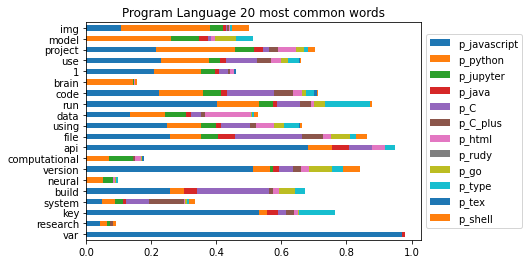

In [18]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_javascript=word_counts.javascript / word_counts['all'],
         p_python=word_counts.python / word_counts['all'],
         p_jupyter=word_counts.jupyter / word_counts['all'],
         p_java=word_counts.java / word_counts['all'],
         p_C=word_counts.C / word_counts['all'],
         p_C_plus=word_counts.C_plus / word_counts['all'],
         p_html=word_counts.html / word_counts['all'],
         p_rudy=word_counts.rudy / word_counts['all'],
         p_go=word_counts.go / word_counts['all'],
         p_type=word_counts.type / word_counts['all'],
         p_tex=word_counts.tex / word_counts['all'],
         p_shell=word_counts.shell / word_counts['all'])
 .sort_values(by='all')
 [['p_javascript', 'p_python', 'p_jupyter', 'p_java', 'p_C', 'p_C_plus', 'p_html', 'p_rudy', 'p_go', 'p_type', 'p_tex', 'p_shell']]
 .tail(20)
 .sort_values('p_python')
 .plot.barh(stacked=True))

plt.title('Program Language 20 most common words')
# move legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# save the plot
plt.savefig('programming_language_20_most_common_words.png')

New questions:

What words can we use to identify the readme program language as Javascript and python.

In [ ]:
# add to repos
"web-sys1/ActionData",
"rvaughan/coronavirus-data",
"weareblahs/covidcases",
"covid19-eu-zh/covid19-eu-data",
"ercbk/Indiana-COVIDcast-Dashboard",
"ercbk/Indiana-COVID-19-Website",
"RamiKrispin/coronavirus",
"covidatlas/coronadatascraper",
"minvws/nl-covid19-notification-app-website",
"ustByte/coronastatus"